# Scatter plot
- Agora que já vimos como fazer várias customizações, vamos apenas apresentar outros plots disponíveis na biblioteca
- Todavia, como sempre falo, é interessante consultar a documentação
    - Existe uma [galeria](https://matplotlib.org/stable/gallery/index.html) que mostra diversas opções de plots disponíveis
- Neste notebook vamos explorar o `scatter` que nada mais é do que um plot de pontos no espaço

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

- **Carregando os mesmos dados usados no notebook anterior:**

In [2]:
df = pd.read_csv("assets/salesman_pivot.csv")
bob = df["Bob"].rolling(10).sum().dropna()
dave = df["Dave"].rolling(10).sum().dropna()

- **Criando o plot:**

Text(0, 0.5, 'Reais')

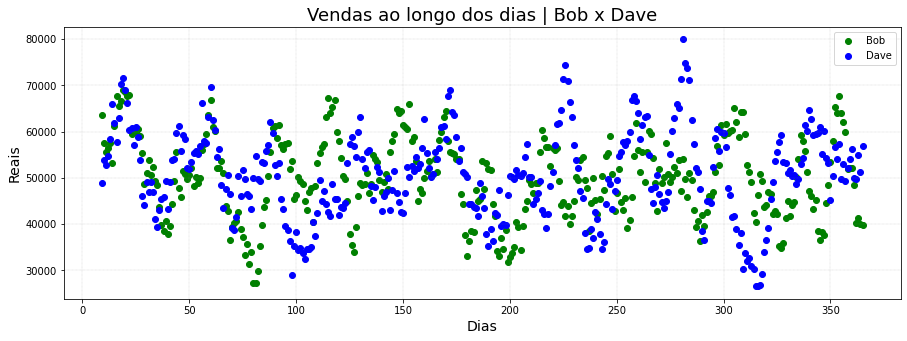

In [3]:
fig, ax = plt.subplots(figsize=(15,5))
days = bob.index
ax.scatter(days, bob, color="g", label="Bob")
ax.scatter(days, dave, color="b", label="Dave")
ax.legend()
ax.grid(True, color='gray', linestyle='dotted', linewidth=0.3)
ax.set_title('Vendas ao longo dos dias | Bob x Dave', size=18)
ax.set_xlabel('Dias', size=14)
ax.set_ylabel('Reais', size=14)

- Perceba, que diferentemente do `ax.plot`:
    - Nós somos obrigados a definir ambos os eixos x e y
    - Os pontos não são conectados
    
- **Basicamente tudo que usamos anteriormente, pode ser explorado aqui também**
    - Como já foi feito no notebook anterior, não vamos repetir tudo aqui

___
## Exercício 3
- Para o plot anterior, faça:
    1. Inclua duas retas verticais, uma para limitar o valor máximo e outra para o valor mínimo. A cor da reta deve ser a mesma da cor do vendedor que atingiu tanto o menor valor quanto o maior
    2. Formate os valores dos ticks do eixo y para mostrar R$
    3. Altere os marcadores (markers) de ambos os venderdores para um de seu interesse
___

- Podemos aumentar o tamanho dos marcadores de acordo com algum peso que atribuimos a eles
- Neste exemplo, vamos ponderar por valor de vendas
- Para acessar os scatters ja adicionados no plot, acessamos o atributo `collections`

In [6]:
ax.collections

- Vamos criar o tamanho dos marcadores de acordo com os valores de vendas

In [21]:
lam_siz = lambda ser: ((ser - ser.min()) / (ser.max() - ser.min())) * 200

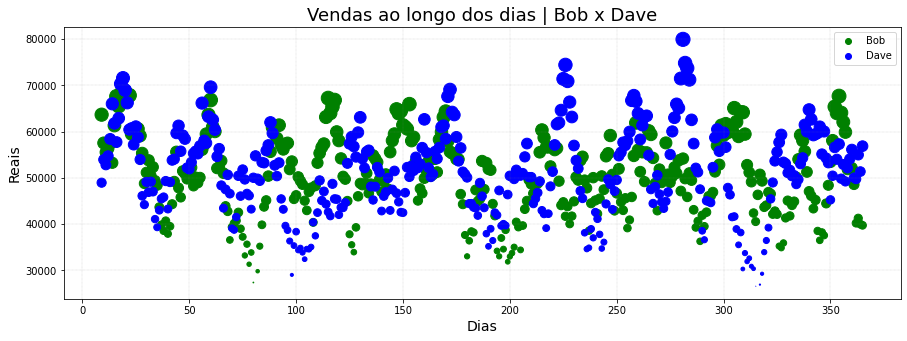

In [22]:
ax.collections[0].set_sizes(lam_siz(bob))
ax.collections[1].set_sizes(lam_siz(dave))
fig

- Porém, perceba que ficou muita coisa sobrepostas. Podemos alterar a opacidade

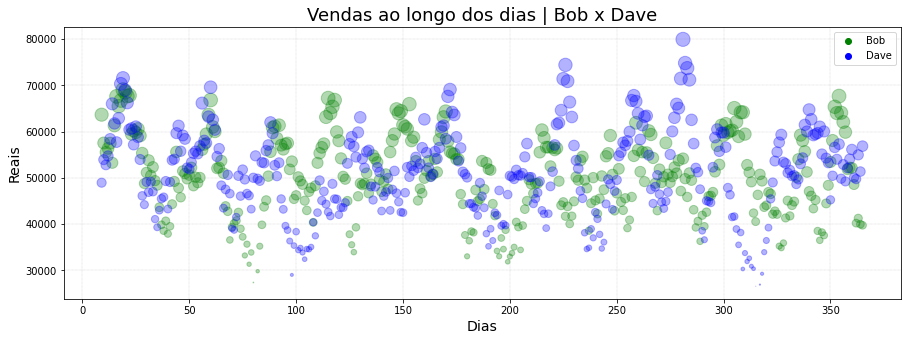

In [23]:
ax.collections[0].set_alpha(0.3)
ax.collections[1].set_alpha(0.3)
fig

- Podemos fazer isso tudo de uma vez:

Text(0, 0.5, 'Reais')

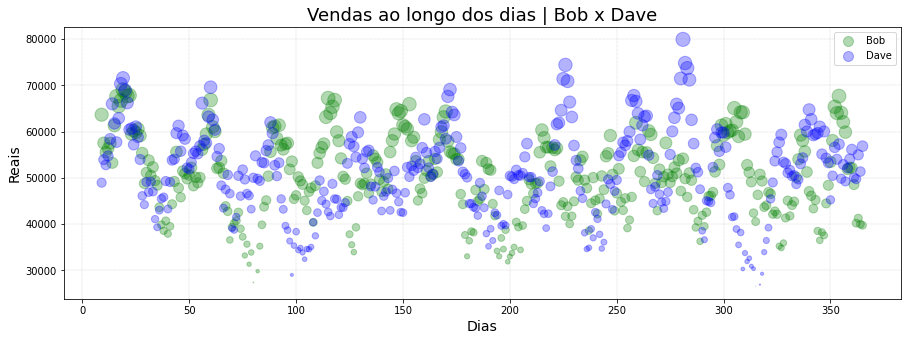

In [25]:
fig, ax = plt.subplots(figsize=(15,5))
days = bob.index
ax.scatter(days, bob, color="g", label="Bob", sizes=lam_siz(bob), alpha=0.3)
ax.scatter(days, dave, color="b", label="Dave", sizes=lam_siz(dave), alpha=0.3)
ax.legend()
ax.grid(True, color='gray', linestyle='dotted', linewidth=0.3)
ax.set_title('Vendas ao longo dos dias | Bob x Dave', size=18)
ax.set_xlabel('Dias', size=14)
ax.set_ylabel('Reais', size=14)